In [1]:
# Google Colab에서 한글 폰트 설정
# !fc-cache -fv
# !rm ~/.cache/matplotlib -rf

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
# 필요한 패키지 설치
!pip install konlpy
!pip install wordcloud
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install gensim
!pip install tensorflow
!pip install nltk
!apt-get update -qq
!apt-get install fonts-nanum* -qq
!apt-get install g++ openjdk-8-jdk python3-dev python3-pip curl
!pip install JPype1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
# KoNLPy 불러오기
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import nltk
from nltk.corpus import stopwords
import warnings
import matplotlib.font_manager as fm
from wordcloud import WordCloud
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from gensim.models import Word2Vec

warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 31.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 18.9 MB/s eta 0:00:00
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum-coding.
(Reading database ... 124970 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-coding (2.5-3) ...
Se

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 4 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/dejavu: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: c

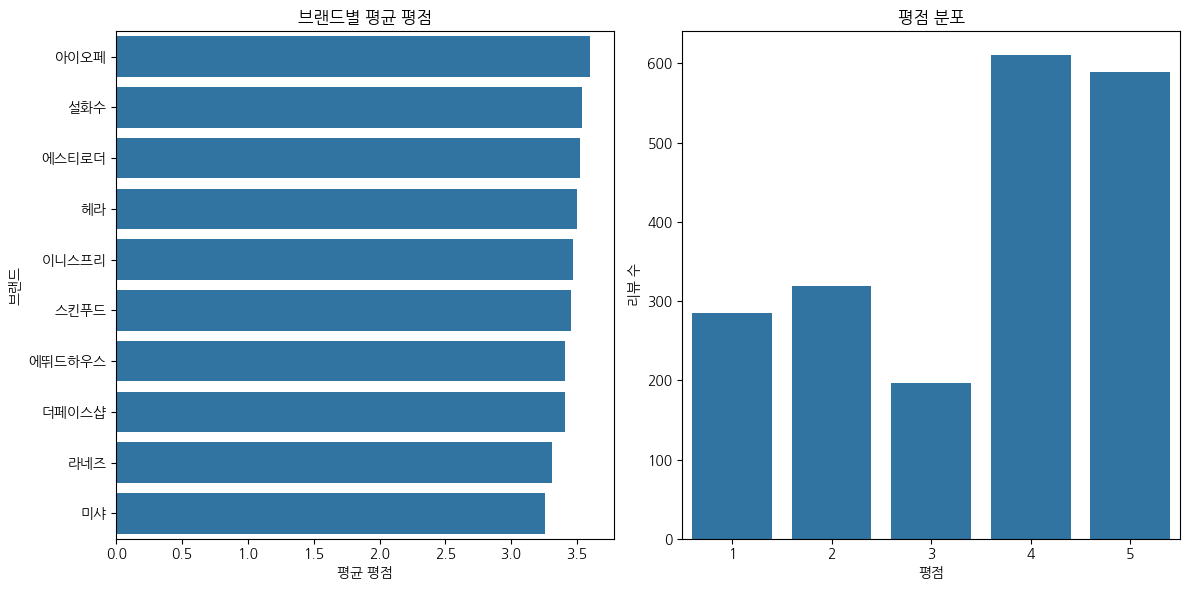

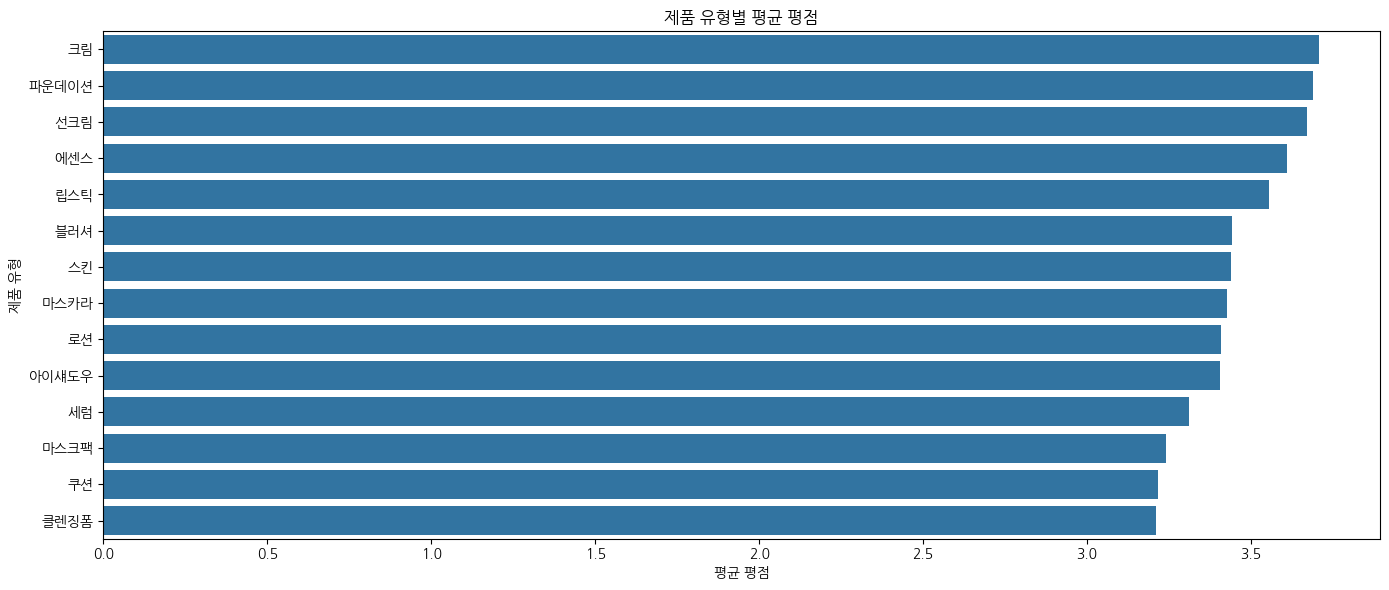

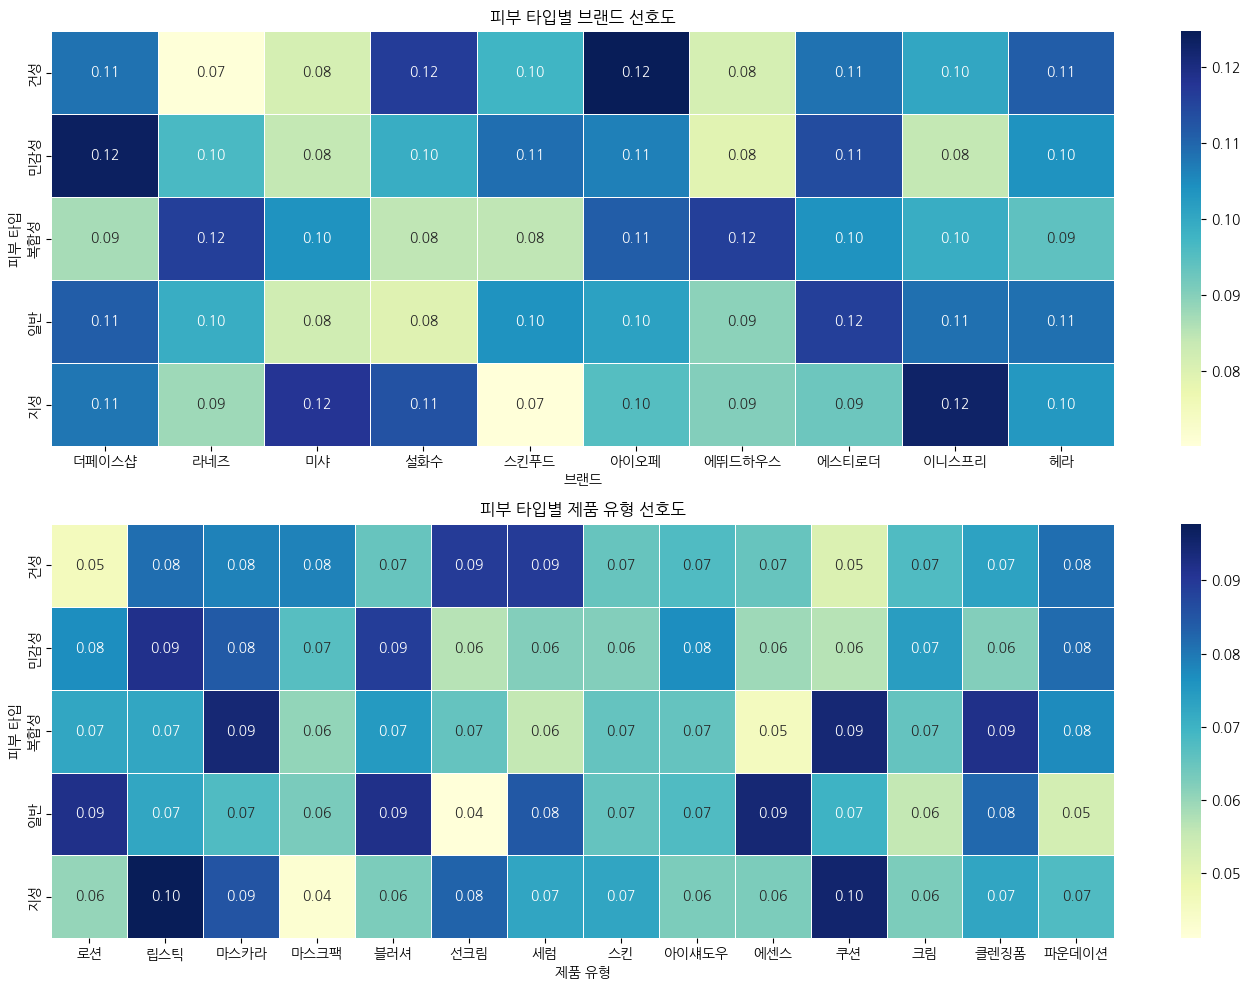

<Figure size 1400x700 with 0 Axes>

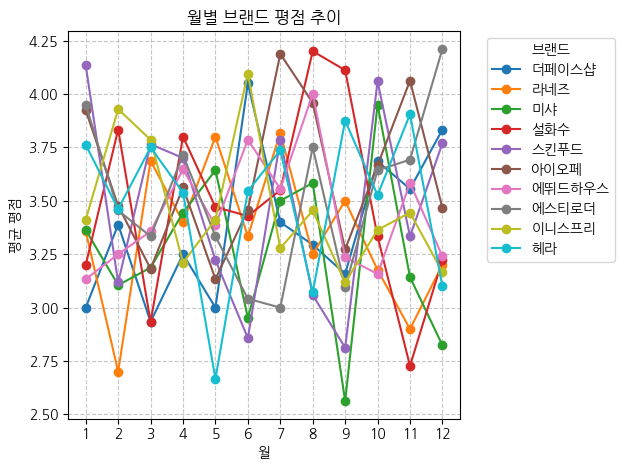

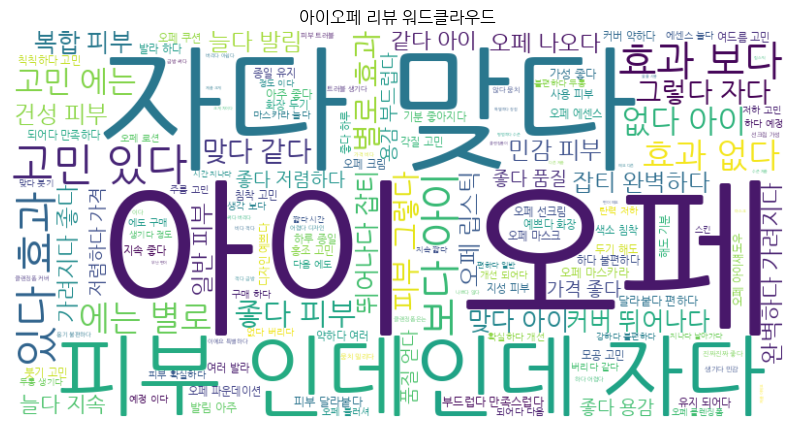

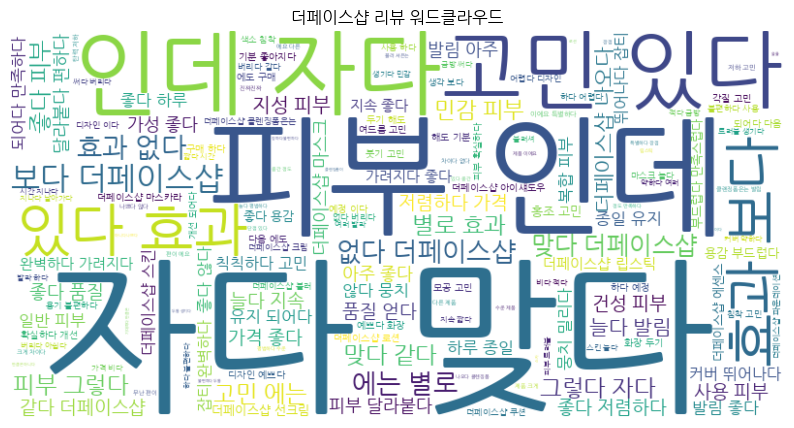

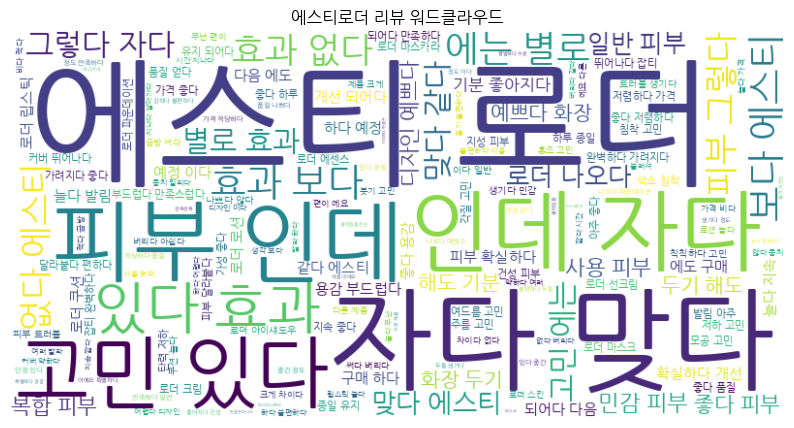

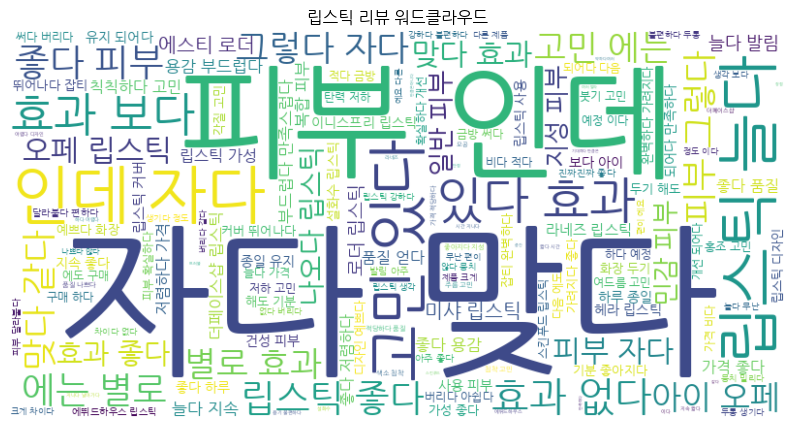

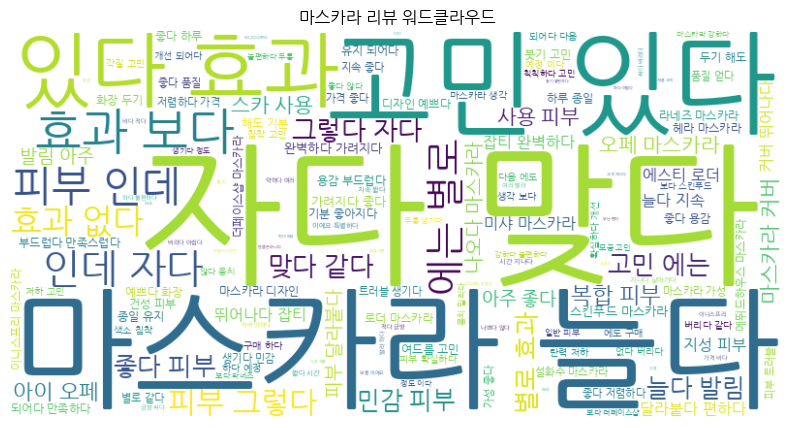

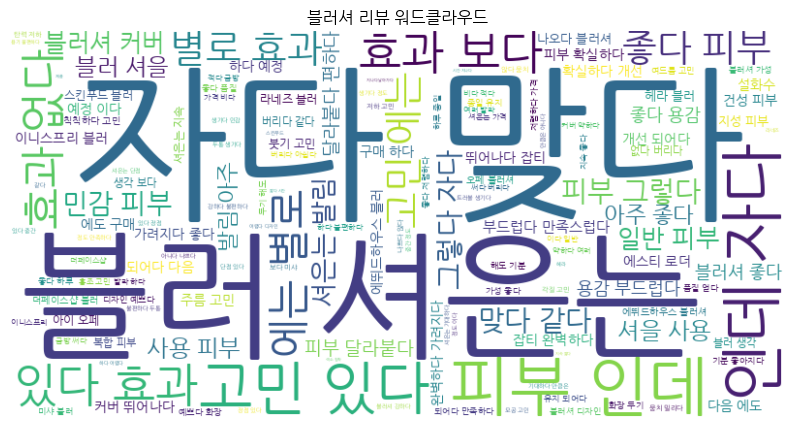


리뷰 토픽 분석 결과:
토픽 #1: 디자인 나오다 좋아지다 화장 기분 해도 두기 예쁘다 고민 효과
토픽 #2: 지속 있다 늘다 좋다 만족하다 커버 가려지다 뛰어나다 잡티 완벽하다
토픽 #3: 피부 좋다 사용 이다 하다 품질 가격 얻다 가성 저렴하다
토픽 #4: 없다 같다 별로 에는 피부 효과 그렇다 자다 맞다 고민
토픽 #5: 좋다 피부 자다 맞다 효과 인데 고민 보다 있다 발림

감성 분석 모델 성능:
              precision    recall  f1-score   support

          부정       1.00      1.00      1.00       131
          긍정       1.00      1.00      1.00       230

    accuracy                           1.00       361
   macro avg       1.00      1.00      1.00       361
weighted avg       1.00      1.00      1.00       361


피부 타입별 제품 추천 예시:

건성 피부, 주름 고민에 맞는 추천:
1. 스킨푸드 세럼 (평점: 4.50, 리뷰 수: 4)
2. 설화수 선크림 (평점: 4.60, 리뷰 수: 5)
3. 에스티로더 스킨 (평점: 5.00, 리뷰 수: 3)
4. 스킨푸드 크림 (평점: 5.00, 리뷰 수: 3)
5. 스킨푸드 에센스 (평점: 5.00, 리뷰 수: 3)

건성 피부, 모공 고민에 맞는 추천:
1. 에스티로더 크림 (평점: 4.75, 리뷰 수: 4)
2. 헤라 선크림 (평점: 5.00, 리뷰 수: 3)
3. 스킨푸드 크림 (평점: 5.00, 리뷰 수: 3)
4. 헤라 아이섀도우 (평점: 4.75, 리뷰 수: 4)
5. 스킨푸드 에센스 (평점: 5.00, 리뷰 수: 3)

건성 피부, 여드름 고민에 맞는 추천:
1. 아이오페 립스틱 (평점: 4.75, 리뷰 수: 4)
2. 더페이스샵 스킨 (

In [3]:


# NLTK 다운로드
nltk.download('stopwords')

# Google Colab에서 한글 폰트 설정
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 한글 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

# 한국어 불용어 리스트 (예시)
korean_stopwords = ['이', '그', '저', '것', '이것', '저것', '그것', '는', '을', '를', '이', '가', '은', '는', '의', '으로', '에', '에서', '와', '과', '로', '으로', '정말', '진짜', '너무', '완전', '매우']

# 가상의 화장품 리뷰 데이터 생성
np.random.seed(42)

# 화장품 브랜드 및 제품 리스트
cosmetic_brands = ['이니스프리', '에뛰드하우스', '스킨푸드', '미샤', '더페이스샵', '헤라', '설화수', '라네즈', '아이오페', '에스티로더']
product_types = ['선크림', '파운데이션', '쿠션', '립스틱', '아이섀도우', '마스카라', '블러셔', '스킨', '로션', '에센스', '세럼', '크림', '클렌징폼', '마스크팩']

# 긍정적인 리뷰 템플릿
positive_reviews = [
    "{brand}의 {product}이(가) 정말 좋아요. 피부에 잘 맞고 효과도 좋습니다.",
    "{brand} {product}의 향이 너무 좋아요. 사용감도 부드럽고 만족스럽습니다.",
    "{brand} {product}의 가성비가 정말 좋습니다. 저렴한 가격에 좋은 품질을 얻었어요.",
    "{brand}에서 나온 {product}의 디자인이 너무 예뻐요. 화장대에 두기만 해도 기분이 좋아집니다.",
    "{brand}의 {product}은(는) 지속력이 정말 좋아요. 하루종일 유지되어서 만족합니다.",
    "{brand} {product}을(를) 사용한 후 피부 톤이 확실히 개선되었어요. 다음에도 구매할 예정입니다.",
    "{brand}의 {product}은(는) 발림성이 아주 좋습니다. 피부에 착 달라붙어서 편해요.",
    "{brand} {product}의 커버력이 뛰어납니다. 잡티가 완벽하게 가려져서 좋아요."
]

# 부정적인 리뷰 템플릿
negative_reviews = [
    "{brand}의 {product}이(가) 생각보다 효과가 없어요. 돈만 버린 것 같습니다.",
    "{brand} {product}의 향이 너무 강해서 불편해요. 두통이 생길 정도입니다.",
    "{brand} {product}은(는) 가격에 비해 양이 너무 적어요. 금방 다 써버려서 아쉽습니다.",
    "{brand}에서 나온 {product}의 용기가 불편해요. 사용하기 어려운 디자인입니다.",
    "{brand}의 {product}은(는) 지속력이 너무 짧아요. 몇 시간 지나면 다 날아갑니다.",
    "{brand} {product}을(를) 사용한 후 피부가 트러블이 생겼어요. 민감성 피부에는 별로인 것 같아요.",
    "{brand}의 {product}은(는) 발림성이 좋지 않아요. 뭉치고 밀립니다.",
    "{brand} {product}의 커버력이 너무 약해요. 여러 번 덧발라야 해서 불편합니다."
]

# 중립적인 리뷰 템플릿
neutral_reviews = [
    "{brand}의 {product}은(는) 보통이에요. 특별히 좋거나 나쁜 점은 없습니다.",
    "{brand} {product}의 가격은 적당해요. 품질도 나쁘지 않습니다.",
    "{brand}에서 나온 {product}은(는) 무난한 편이에요. 다른 제품과 크게 차이는 없어요.",
    "{brand}의 {product}은(는) 기대했던 만큼은 아니지만 나쁘지 않아요.",
    "{brand} {product}은(는) 평범한 수준의 제품이에요. 특별한 장점은 없네요.",
    "{brand}의 {product}은(는) 단점도 있지만 장점도 있어요. 딱 중간 정도 만족합니다."
]

# 피부타입 및 특성
skin_types = ['건성', '지성', '복합성', '민감성', '일반']
skin_concerns = ['주름', '모공', '색소침착', '여드름', '홍조', '탄력저하', '각질', '칙칙함', '붓기']

# 데이터 생성 함수
def generate_cosmetic_review_data(n_samples=1000):
    data = []

    for _ in range(n_samples):
        brand = np.random.choice(cosmetic_brands)
        product_type = np.random.choice(product_types)
        product = f"{product_type}"
        sentiment = np.random.choice(['긍정', '부정', '중립'], p=[0.6, 0.3, 0.1])

        if sentiment == '긍정':
            review_template = np.random.choice(positive_reviews)
            rating = np.random.randint(4, 6)  # 4-5점
        elif sentiment == '부정':
            review_template = np.random.choice(negative_reviews)
            rating = np.random.randint(1, 3)  # 1-2점
        else:
            review_template = np.random.choice(neutral_reviews)
            rating = 3  # 3점

        review = review_template.format(brand=brand, product=product)

        # 사용자 피부 타입과 고민 추가
        user_skin_type = np.random.choice(skin_types)
        user_skin_concern = np.random.choice(skin_concerns)

        # 추가 정보를 리뷰에 포함
        if np.random.random() < 0.5:
            review += f" {user_skin_type} 피부인데 잘 맞아요." if sentiment == '긍정' else f" {user_skin_type} 피부라 그런지 잘 안 맞는 것 같아요."

        if np.random.random() < 0.5:
            review += f" {user_skin_concern} 고민이 있었는데 효과를 봤어요." if sentiment == '긍정' else f" {user_skin_concern} 고민에는 별로 효과가 없었어요."

        # 약간의 무작위성 추가
        if np.random.random() < 0.3:
            typos = ['너무너무', '정말정말', '매우매우', '진짜진짜']
            review = review.replace('정말', np.random.choice(typos))

        # 날짜 생성 (2024년)
        month = np.random.randint(1, 13)
        day = np.random.randint(1, 29)
        date = f'2024-{month:02d}-{day:02d}'

        # 사용자 ID 생성
        user_id = f'user_{np.random.randint(1, 501)}'

        # 제품 가격대 설정
        price_category = np.random.choice(['저가', '중가', '고가'])

        # 구매 경로
        purchase_channel = np.random.choice(['온라인몰', '백화점', '드럭스토어', '브랜드샵', '면세점'])

        data.append({
            'user_id': user_id,
            'brand': brand,
            'product_type': product_type,
            'product': product,
            'rating': rating,
            'review': review,
            'date': date,
            'sentiment': sentiment,
            'skin_type': user_skin_type,
            'skin_concern': user_skin_concern,
            'price_category': price_category,
            'purchase_channel': purchase_channel
        })

    return pd.DataFrame(data)

# 가상 데이터 생성
df = generate_cosmetic_review_data(2000)
print("데이터 샘플:")
print(df.head())
print("\n데이터 통계:")
print(df.describe())
print("\n브랜드별 리뷰 수:")
print(df['brand'].value_counts())
print("\n제품 유형별 리뷰 수:")
print(df['product_type'].value_counts())
print("\n평점 분포:")
print(df['rating'].value_counts().sort_index())

# 데이터 시각화
plt.figure(figsize=(12, 6))

# 브랜드별 평균 평점
plt.subplot(1, 2, 1)
brand_ratings = df.groupby('brand')['rating'].mean().sort_values(ascending=False)
sns.barplot(x=brand_ratings.values, y=brand_ratings.index)
plt.title('브랜드별 평균 평점')
plt.xlabel('평균 평점')
plt.ylabel('브랜드')

# 평점 분포
plt.subplot(1, 2, 2)
sns.countplot(x='rating', data=df)
plt.title('평점 분포')
plt.xlabel('평점')
plt.ylabel('리뷰 수')

plt.tight_layout()
plt.show()

# 제품 유형별 평균 평점
plt.figure(figsize=(14, 6))
product_ratings = df.groupby('product_type')['rating'].mean().sort_values(ascending=False)
sns.barplot(x=product_ratings.values, y=product_ratings.index)
plt.title('제품 유형별 평균 평점')
plt.xlabel('평균 평점')
plt.ylabel('제품 유형')
plt.tight_layout()
plt.show()

# 피부 타입별 선호도 분석
plt.figure(figsize=(14, 10))

# 피부 타입별 브랜드 선호도
plt.subplot(2, 1, 1)
skin_brand_counts = pd.crosstab(df['skin_type'], df['brand'])
skin_brand_prefs = skin_brand_counts.div(skin_brand_counts.sum(axis=1), axis=0)
sns.heatmap(skin_brand_prefs, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=.5)
plt.title('피부 타입별 브랜드 선호도')
plt.ylabel('피부 타입')
plt.xlabel('브랜드')

# 피부 타입별 제품 유형 선호도
plt.subplot(2, 1, 2)
skin_product_counts = pd.crosstab(df['skin_type'], df['product_type'])
skin_product_prefs = skin_product_counts.div(skin_product_counts.sum(axis=1), axis=0)
sns.heatmap(skin_product_prefs, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=.5)
plt.title('피부 타입별 제품 유형 선호도')
plt.ylabel('피부 타입')
plt.xlabel('제품 유형')

plt.tight_layout()
plt.show()

# 시간에 따른 브랜드별 평점 추이
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month

plt.figure(figsize=(14, 7))
monthly_ratings = df.groupby(['month', 'brand'])['rating'].mean().unstack()
monthly_ratings.plot(marker='o')
plt.title('월별 브랜드 평점 추이')
plt.xlabel('월')
plt.ylabel('평균 평점')
plt.xticks(range(1, 13))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='브랜드', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 자연어 처리를 위한 함수
okt = Okt()

def preprocess_text(text):
    # 한글과 공백을 제외한 문자 제거
    text = re.sub(r'[^가-힣\s]', '', text)

    # 형태소 분석
    tokens = okt.morphs(text, stem=True)

    # 불용어 제거
    tokens = [token for token in tokens if token not in korean_stopwords and len(token) > 1]

    return ' '.join(tokens)

# 리뷰 전처리
df['processed_review'] = df['review'].apply(preprocess_text)

# 브랜드별 워드클라우드 생성
def generate_wordcloud(brand_name):
    brand_reviews = ' '.join(df[df['brand'] == brand_name]['processed_review'].tolist())

    wordcloud = WordCloud(
        font_path=font_path,
        width=800,
        height=400,
        background_color='white'
    ).generate(brand_reviews)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'{brand_name} 리뷰 워드클라우드')
    plt.axis('off')
    plt.show()

# 상위 3개 브랜드에 대한 워드클라우드 생성
top_brands = df['brand'].value_counts().nlargest(3).index
for brand in top_brands:
    generate_wordcloud(brand)

# 제품 유형별 워드클라우드 생성
def generate_product_wordcloud(product_type):
    product_reviews = ' '.join(df[df['product_type'] == product_type]['processed_review'].tolist())

    wordcloud = WordCloud(
        font_path=font_path,
        width=800,
        height=400,
        background_color='white'
    ).generate(product_reviews)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'{product_type} 리뷰 워드클라우드')
    plt.axis('off')
    plt.show()

# 상위 3개 제품 유형에 대한 워드클라우드 생성
top_products = df['product_type'].value_counts().nlargest(3).index
for product in top_products:
    generate_product_wordcloud(product)

# 토픽 모델링 (LDA)
vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['processed_review'])
feature_names = vectorizer.get_feature_names_out()

# LDA 모델 학습
n_topics = 5
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(X)

# 토픽 시각화
def display_topics(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
        top_words = [feature_names[i] for i in top_words_idx]
        print(f"토픽 #{topic_idx + 1}: {' '.join(top_words)}")

print("\n리뷰 토픽 분석 결과:")
display_topics(lda, feature_names, 10)

# 감성 분석 모델 학습
# 긍정/부정으로 이진 분류 (중립은 제외)
binary_df = df[df['sentiment'] != '중립'].copy()
binary_df['sentiment_binary'] = binary_df['sentiment'].map({'긍정': 1, '부정': 0})

# 특성 벡터화
tfidf = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf.fit_transform(binary_df['processed_review'])
y = binary_df['sentiment_binary']

# 훈련/테스트 세트 분할
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 학습
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train, y_train)

# 모델 평가
y_pred = lr.predict(X_test)
print("\n감성 분석 모델 성능:")
print(classification_report(y_test, y_pred, target_names=['부정', '긍정']))

# 피부 타입별 추천 시스템
def get_recommendations_by_skin_type(skin_type, skin_concern, product_type=None, top_n=5):
    """피부 타입과 고민에 맞는 제품 추천"""
    # 필터링: 해당 피부 타입의, 높은 평점 리뷰만
    filtered_df = df[(df['skin_type'] == skin_type) & (df['rating'] >= 4)]

    # 해당 피부 고민이 있는 사용자의 리뷰에 가중치 부여
    if len(filtered_df) == 0:
        return []

    # 특정 제품 유형이 지정된 경우 추가 필터링
    if product_type:
        filtered_df = filtered_df[filtered_df['product_type'] == product_type]
        if len(filtered_df) == 0:
            return []

    # 해당 피부 고민 관련 리뷰에 가중치 부여
    concern_weight = filtered_df['review'].str.contains(skin_concern).astype(int) * 0.5 + 1
    weighted_rating = filtered_df['rating'] * concern_weight

    # 브랜드-제품 조합으로 그룹화하고 가중 평균 계산
    product_scores = filtered_df.copy()
    product_scores['weighted_rating'] = weighted_rating
    product_scores['product_full'] = product_scores['brand'] + ' ' + product_scores['product_type']

    recommendations = product_scores.groupby('product_full').agg({
        'weighted_rating': 'mean',
        'brand': 'first',
        'product_type': 'first',
        'rating': 'mean',
        'review': 'count'
    }).sort_values('weighted_rating', ascending=False)

    # 최소 리뷰 수 필터 (3개 이상)
    recommendations = recommendations[recommendations['review'] >= 3]

    return recommendations.head(top_n)

# 추천 예시
print("\n피부 타입별 제품 추천 예시:")
skin_types_sample = ['건성', '지성', '민감성']
skin_concerns_sample = ['주름', '모공', '여드름']

for skin_type in skin_types_sample:
    for skin_concern in skin_concerns_sample:
        print(f"\n{skin_type} 피부, {skin_concern} 고민에 맞는 추천:")
        recommendations = get_recommendations_by_skin_type(skin_type, skin_concern)

        if len(recommendations) > 0:
            for i, (idx, row) in enumerate(recommendations.iterrows(), 1):
                print(f"{i}. {idx} (평점: {row['rating']:.2f}, 리뷰 수: {row['review']})")
        else:
            print("추천할 제품이 없습니다.")

# 아이템 기반 협업 필터링
# 제품 간 유사도 계산
# 브랜드-제품 타입의 조합을 하나의 아이템으로 취급
df['product_id'] = df['brand'] + ' ' + df['product_type']

# 사용자-제품 매트릭스 생성
user_product_matrix = df.pivot_table(index='user_id', columns='product_id', values='rating', fill_value=0)

# 제품-제품 유사도 행렬 계산
product_similarity = cosine_similarity(user_product_matrix.T)
product_similarity_df = pd.DataFrame(product_similarity, index=user_product_matrix.columns, columns=user_product_matrix.columns)

# 아이템 기반 추천 함수
def item_based_recommendations(product_id, n_recommendations=5):
    """아이템 기반 협업 필터링으로 유사한 제품 추천"""
    if product_id not in product_similarity_df.index:
        return []

    # 해당 제품과 유사한 제품 찾기
    similar_products = product_similarity_df[product_id].drop(product_id).sort_values(ascending=False)

    # 결과 포맷팅
    recommendations = pd.DataFrame({
        'product_id': similar_products.index,
        'similarity': similar_products.values
    })

    return recommendations.head(n_recommendations)

# 아이템 기반 추천 예시
print("\n아이템 기반 협업 필터링 추천 예시:")
sample_products = df['product_id'].unique()[:3]
for product in sample_products:
    print(f"\n{product}와(과) 유사한 제품:")
    similar_products = item_based_recommendations(product)
    for i, row in similar_products.iterrows():
        print(f"- {row['product_id']} (유사도: {row['similarity']:.3f})")

# 컨텐츠 기반 필터링
# 리뷰 텍스트 기반 제품 유사도 계산
product_reviews = df.groupby('product_id')['processed_review'].apply(' '.join)
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
product_tfidf = tfidf_vectorizer.fit_transform(product_reviews)
product_tfidf_similarity = cosine_similarity(product_tfidf)
product_tfidf_sim_df = pd.DataFrame(product_tfidf_similarity, index=product_reviews.index, columns=product_reviews.index)

def content_based_recommendation(product_id, similarity_df, n_recommendations=3):
    """컨텐츠 기반 필터링으로 유사한 제품 추천"""
    if product_id not in similarity_df.index:
        return [], []

    # 입력 제품과 유사한 제품 찾기
    similar_products = similarity_df[product_id].drop(product_id).sort_values(ascending=False)

    return similar_products.index.tolist()[:n_recommendations], similar_products.values.tolist()[:n_recommendations]

# 컨텐츠 기반 추천 예시
print("\n컨텐츠 기반 필터링 추천 예시:")
for product in sample_products:
    similar_products, similarity_scores = content_based_recommendation(product, product_tfidf_sim_df)
    print(f"\n{product}과(와) 유사한 제품 (리뷰 텍스트 기반):")
    for p, score in zip(similar_products, similarity_scores):
        print(f"- {p} (유사도: {score:.3f})")

# 하이브리드 추천 시스템
def hybrid_recommendation(user_id, product_id, skin_type, skin_concern,
                          alpha=0.4, beta=0.3, gamma=0.3, n_recommendations=5):
    """하이브리드 추천 시스템: 협업 필터링 + 컨텐츠 기반 + 피부 타입 기반"""

    recommendations = {}

    # 1. 아이템 기반 협업 필터링
    if product_id in product_similarity_df.index:
        cf_recs = item_based_recommendations(product_id, n_recommendations*2)
        for i, row in cf_recs.iterrows():
            product = row['product_id']
            score = row['similarity'] * alpha
            recommendations[product] = recommendations.get(product, 0) + score

    # 2. 컨텐츠 기반 필터링
    if product_id in product_tfidf_sim_df.index:
        cb_products, cb_scores = content_based_recommendation(product_id, product_tfidf_sim_df, n_recommendations*2)
        for product, score in zip(cb_products, cb_scores):
            recommendations[product] = recommendations.get(product, 0) + score * beta

    # 3. 피부 타입 기반 추천
    skin_recs = get_recommendations_by_skin_type(skin_type, skin_concern, top_n=n_recommendations*2)
    for idx, row in skin_recs.iterrows():
        # 이미 추천에 있으면 점수 가중
        # 정규화된 가중치 적용 (최대 평점은 5)
        normalized_weight = row['weighted_rating'] / 5 * gamma
        recommendations[idx] = recommendations.get(idx, 0) + normalized_weight

    # 최종 추천 결과 정렬
    sorted_recs = sorted(recommendations.items(), key=lambda x: x[1], reverse=True)

    # 이미 사용 중인 제품 제외
    filtered_recs = [rec for rec in sorted_recs if rec[0] != product_id]

    return filtered_recs[:n_recommendations]

# 하이브리드 추천 예시
print("\n하이브리드 추천 시스템 예시:")
sample_users = df['user_id'].unique()[:3]

for user in sample_users:
    # 해당 사용자 정보 가져오기
    user_data = df[df['user_id'] == user].iloc[0]
    product_id = user_data['product_id']
    skin_type = user_data['skin_type']
    skin_concern = user_data['skin_concern']

    print(f"\n사용자 {user} (피부타입: {skin_type}, 피부고민: {skin_concern})가 현재 사용 중인 제품: {product_id}")

    hybrid_recs = hybrid_recommendation(user, product_id, skin_type, skin_concern)
    print("추천 제품:")
    for i, (product, score) in enumerate(hybrid_recs, 1):
        print(f"{i}. {product} (점수: {score:.3f})")

# 계절별 화장품 추천 시스템
def seasonal_recommendation(season, product_type=None, top_n=5):
    """계절에 따른 화장품 추천"""
    # 계절별 키워드 매핑
    season_keywords = {
        '봄': ['촉촉', '밝은', '가벼운', '화사한', '자외선'],
        '여름': ['수분', '쿨링', '자외선', '산뜻한', '번들거림', '메이크업픽서'],
        '가을': ['보습', '윤기', '매트', '따뜻한', '생기'],
        '겨울': ['건조', '보습', '영양', '탄력', '크림', '오일']
    }

    if season not in season_keywords:
        return pd.DataFrame()

    # 해당 계절의 키워드가 포함된 리뷰 필터링
    seasonal_scores = {}
    keywords = season_keywords[season]

    for keyword in keywords:
        # 키워드가 포함된 리뷰 찾기
        mask = df['review'].str.contains(keyword)
        if mask.sum() > 0:
            # 평점이 높고 키워드가 포함된 리뷰의 제품 점수 계산
            keyword_df = df[mask & (df['rating'] >= 4)]
            if product_type:
                keyword_df = keyword_df[keyword_df['product_type'] == product_type]

            # 제품별 점수 집계
            for _, row in keyword_df.iterrows():
                product = row['product_id']
                # 키워드별 가중치 적용 (모든 키워드가 동일한 중요도를 갖는다고 가정)
                weight = 1.0 / len(keywords)
                # 평점 기반 점수 계산
                score = (row['rating'] / 5) * weight
                seasonal_scores[product] = seasonal_scores.get(product, 0) + score

    # 점수 기준으로 정렬
    sorted_products = sorted(seasonal_scores.items(), key=lambda x: x[1], reverse=True)

    # 데이터프레임으로 변환
    if sorted_products:
        result_df = pd.DataFrame(sorted_products, columns=['product_id', 'seasonal_score'])
        # 리뷰 수 추가
        product_review_counts = df.groupby('product_id')['review'].count()
        result_df['review_count'] = result_df['product_id'].map(product_review_counts)

        # 최소 리뷰 수 필터 (3개 이상)
        result_df = result_df[result_df['review_count'] >= 3]

        return result_df.head(top_n)

    return pd.DataFrame()

# 계절별 추천 예시
print("\n계절별 화장품 추천:")
seasons = ['봄', '여름', '가을', '겨울']
product_types_sample = ['선크림', '파운데이션', '립스틱']

for season in seasons:
    print(f"\n{season}철 추천 화장품:")
    season_recs = seasonal_recommendation(season)

    if not season_recs.empty:
        for i, (_, row) in enumerate(season_recs.iterrows(), 1):
            print(f"{i}. {row['product_id']} (계절 적합도: {row['seasonal_score']:.3f}, 리뷰 수: {row['review_count']})")
    else:
        print("추천할 제품이 없습니다.")

    # 제품 유형별 계절 추천
    for product_type in product_types_sample:
        print(f"\n{season}철 {product_type} 추천:")
        type_season_recs = seasonal_recommendation(season, product_type)

        if not type_season_recs.empty:
            for i, (_, row) in enumerate(type_season_recs.iterrows(), 1):
                print(f"{i}. {row['product_id']} (계절 적합도: {row['seasonal_score']:.3f}, 리뷰 수: {row['review_count']})")
        else:
            print("추천할 제품이 없습니다.")

# 가격대별 가성비 상품 추천
def value_for_money_recommendation(price_category, product_type=None, top_n=5):
    """가격대별 가성비 좋은 제품 추천"""
    if price_category not in ['저가', '중가', '고가']:
        return pd.DataFrame()

    # 가격대에 맞는 제품 필터링
    price_df = df[df['price_category'] == price_category]

    if product_type:
        price_df = price_df[price_df['product_type'] == product_type]

    if len(price_df) == 0:
        return pd.DataFrame()

    # 가성비 점수 계산: 평점 + 가성비 관련 키워드 보너스
    value_keywords = ['가성비', '저렴', '합리', '대비', '효과']

    # 제품별 가성비 점수 계산
    price_df['value_bonus'] = price_df['review'].apply(
        lambda x: sum(1 for kw in value_keywords if kw in x) * 0.2  # 키워드당 0.2점 보너스
    )
    price_df['value_score'] = price_df['rating'] + price_df['value_bonus']

    # 제품별 평균 가성비 점수
    product_value_scores = price_df.groupby('product_id').agg({
        'value_score': 'mean',
        'rating': 'mean',
        'review': 'count'
    }).sort_values('value_score', ascending=False)

    # 최소 리뷰 수 필터 (3개 이상)
    product_value_scores = product_value_scores[product_value_scores['review'] >= 3]

    return product_value_scores.head(top_n)

# 가격대별 가성비 추천 예시
print("\n가격대별 가성비 좋은 화장품 추천:")
price_categories = ['저가', '중가', '고가']

for price in price_categories:
    print(f"\n{price} 화장품 중 가성비 좋은 제품:")
    value_recs = value_for_money_recommendation(price)

    if not value_recs.empty:
        for i, (product, row) in enumerate(value_recs.iterrows(), 1):
            print(f"{i}. {product} (가성비 점수: {row['value_score']:.2f}, 평균 평점: {row['rating']:.2f}, 리뷰 수: {row['review']})")
    else:
        print("추천할 제품이 없습니다.")

# 화장품 트렌드 분석
def trend_analysis(months=3):
    """최근 트렌드 분석 (최근 n개월 데이터 기준)"""
    # 최근 데이터 필터링
    df['date'] = pd.to_datetime(df['date'])
    latest_date = df['date'].max()
    start_date = latest_date - pd.DateOffset(months=months)
    recent_df = df[df['date'] >= start_date]

    if len(recent_df) == 0:
        return {
            'trend_products': pd.DataFrame(),
            'trend_keywords': [],
            'rising_brands': pd.DataFrame()
        }

    # 1. 트렌드 제품: 최근 높은 평점을 받은 제품
    trend_products = recent_df.groupby('product_id').agg({
        'rating': 'mean',
        'review': 'count'
    }).sort_values(['rating', 'review'], ascending=[False, False])

    # 리뷰 수 최소 기준
    trend_products = trend_products[trend_products['review'] >= 5]

    # 2. 트렌드 키워드: 최근 리뷰에서 자주 언급되는 긍정적인 키워드
    recent_positive = recent_df[recent_df['sentiment'] == '긍정']
    positive_words = ' '.join(recent_positive['processed_review']).split()
    trend_keywords = Counter(positive_words).most_common(20)

    # 3. 상승세 브랜드: 최근 평점이 상승한 브랜드
    # 이전 기간 vs 최근 기간 평점 비교
    prev_start_date = start_date - pd.DateOffset(months=months)
    prev_df = df[(df['date'] >= prev_start_date) & (df['date'] < start_date)]

    if len(prev_df) > 0:
        # 이전 기간 브랜드별 평점
        prev_brand_ratings = prev_df.groupby('brand')['rating'].mean()

        # 최근 기간 브랜드별 평점
        recent_brand_ratings = recent_df.groupby('brand')['rating'].mean()

        # 두 기간 모두 데이터가 있는 브랜드만
        common_brands = set(prev_brand_ratings.index) & set(recent_brand_ratings.index)

        rising_brands = pd.DataFrame({
            'recent_rating': [recent_brand_ratings[brand] for brand in common_brands],
            'prev_rating': [prev_brand_ratings[brand] for brand in common_brands],
            'brand': list(common_brands)
        })

        rising_brands['rating_change'] = rising_brands['recent_rating'] - rising_brands['prev_rating']
        rising_brands = rising_brands.sort_values('rating_change', ascending=False)
    else:
        # 이전 기간 데이터가 없는 경우
        rising_brands = pd.DataFrame()

    return {
        'trend_products': trend_products.head(10),
        'trend_keywords': trend_keywords,
        'rising_brands': rising_brands.head(5) if not rising_brands.empty else pd.DataFrame()
    }

# 트렌드 분석 결과 출력
print("\n화장품 트렌드 분석 (최근 3개월):")
trends = trend_analysis(3)

print("\n1. 트렌드 제품 (최근 인기 제품):")
if not trends['trend_products'].empty:
    for i, (product, row) in enumerate(trends['trend_products'].iterrows(), 1):
        print(f"{i}. {product} (평균 평점: {row['rating']:.2f}, 리뷰 수: {row['review']})")
else:
    print("데이터가 충분하지 않습니다.")

print("\n2. 트렌드 키워드 (자주 언급되는 긍정적 키워드):")
if trends['trend_keywords']:
    for keyword, count in trends['trend_keywords'][:10]:  # 상위 10개만 표시
        print(f"- {keyword}: {count}회 언급")
else:
    print("데이터가 충분하지 않습니다.")

print("\n3. 상승세 브랜드 (평점이 상승한 브랜드):")
if not trends['rising_brands'].empty:
    for i, row in trends['rising_brands'].iterrows():
        print(f"- {row['brand']}: {row['prev_rating']:.2f} → {row['recent_rating']:.2f} (변화: {row['rating_change']:.2f})")
else:
    print("데이터가 충분하지 않습니다.")

# 사용자 기반 추천 시스템 (신규 사용자 콜드 스타트 문제 해결)
def new_user_recommendation(skin_type, skin_concern, preferred_brands=None, price_category=None):
    """신규 사용자를 위한 추천 시스템"""
    # 1. 피부 타입 및 고민 기반 필터링
    filtered_df = df[df['skin_type'] == skin_type]

    # 2. 브랜드 선호도 반영
    if preferred_brands:
        if isinstance(preferred_brands, str):
            preferred_brands = [preferred_brands]
        brand_bonus = df['brand'].apply(lambda x: 0.5 if x in preferred_brands else 0)
    else:
        brand_bonus = 0

    # 3. 가격대 필터링
    if price_category:
        filtered_df = filtered_df[filtered_df['price_category'] == price_category]

    if len(filtered_df) == 0:
        return pd.DataFrame()

    # 4. 피부 고민 관련 리뷰에 가중치 부여
    concern_weight = filtered_df['review'].str.contains(skin_concern).astype(int) * 0.3 + 1

    # 5. 최종 점수 계산
    filtered_df['final_score'] = filtered_df['rating'] * concern_weight + brand_bonus

    # 제품별 평균 점수
    product_scores = filtered_df.groupby('product_id').agg({
        'final_score': 'mean',
        'rating': 'mean',
        'review': 'count'
    }).sort_values('final_score', ascending=False)

    # 최소 리뷰 수 필터 (3개 이상)
    product_scores = product_scores[product_scores['review'] >= 3]

    return product_scores.head(5)

# 신규 사용자 추천 예시
print("\n신규 사용자 추천 시스템 예시:")
sample_skin_types = ['건성', '지성', '민감성']
sample_skin_concerns = ['주름', '모공', '여드름']
sample_preferred_brands = ['이니스프리', '라네즈', '설화수']
sample_price_categories = ['저가', '중가', '고가']

for i, (skin_type, concern) in enumerate(zip(sample_skin_types, sample_skin_concerns)):
    preferred_brand = sample_preferred_brands[i % len(sample_preferred_brands)]
    price = sample_price_categories[i % len(sample_price_categories)]

    print(f"\n신규 사용자 (피부타입: {skin_type}, 피부고민: {concern}, 선호 브랜드: {preferred_brand}, 가격대: {price})의 추천:")
    recommendations = new_user_recommendation(skin_type, concern, preferred_brand, price)

    if not recommendations.empty:
        for j, (product, row) in enumerate(recommendations.iterrows(), 1):
            print(f"{j}. {product} (점수: {row['final_score']:.2f}, 평균 평점: {row['rating']:.2f}, 리뷰 수: {row['review']})")
    else:
        print("추천할 제품이 없습니다.")

# 결론 및 제안사항
print("\n===== 화장품 리뷰 분석 결론 및 제안사항 =====")

# 1. 브랜드별 평가
brand_ratings = df.groupby('brand')['rating'].mean().sort_values(ascending=False)
best_brand = brand_ratings.index[0]
worst_brand = brand_ratings.index[-1]

print(f"1. 브랜드 평가:")
print(f"   - 최고 평점 브랜드: {best_brand} ({brand_ratings[best_brand]:.2f}점)")
print(f"   - 최저 평점 브랜드: {worst_brand} ({brand_ratings[worst_brand]:.2f}점)")

# 2. 제품 유형별 평가
product_ratings = df.groupby('product_type')['rating'].mean().sort_values(ascending=False)
best_product_type = product_ratings.index[0]
worst_product_type = product_ratings.index[-1]

print(f"\n2. 제품 유형별 평가:")
print(f"   - 최고 평점 제품 유형: {best_product_type} ({product_ratings[best_product_type]:.2f}점)")
print(f"   - 최저 평점 제품 유형: {worst_product_type} ({product_ratings[worst_product_type]:.2f}점)")

# 3. 피부 타입별 추천 브랜드
print("\n3. 피부 타입별 최적 브랜드:")
for skin_type in skin_types:
    skin_type_ratings = df[df['skin_type'] == skin_type].groupby('brand')['rating'].mean().sort_values(ascending=False)
    if not skin_type_ratings.empty:
        top_brand = skin_type_ratings.index[0]
        print(f"   - {skin_type} 피부: {top_brand} ({skin_type_ratings[top_brand]:.2f}점)")

# 4. 주요 키워드 분석
def get_top_keywords(texts, sentiment, n=5):
    # 해당 감성의 리뷰만 선택
    selected_texts = ' '.join(texts[df['sentiment'] == sentiment])

    # 단어 카운트
    words = okt.nouns(selected_texts)
    word_count = Counter([w for w in words if len(w) > 1 and w not in korean_stopwords])

    # 상위 키워드 반환
    return word_count.most_common(n)

positive_keywords = get_top_keywords(df['review'], '긍정')
negative_keywords = get_top_keywords(df['review'], '부정')

print("\n4. 화장품 만족 주요 키워드:")
for word, count in positive_keywords:
    print(f"   - {word} ({count}회 언급)")

print("\n5. 화장품 불만족 주요 키워드:")
for word, count in negative_keywords:
    print(f"   - {word} ({count}회 언급)")

# 5. 브랜드별 개선 제안사항
print("\n6. 브랜드별 개선 제안사항:")
for brand in cosmetic_brands[:3]:  # 상위 3개 브랜드에 대한 제안사항
    brand_df = df[df['brand'] == brand]
    brand_rating = brand_df['rating'].mean()

    print(f"\n   {brand} (평균 평점: {brand_rating:.2f}):")

    if brand_rating >= 4.5:
        print("   - 현재 높은 평점을 유지하고 있으나, 지속적인 품질 관리가 필요합니다.")
    elif brand_rating >= 4.0:
        neg_keywords = get_top_keywords(brand_df['review'], '부정', 3)
        print(f"   - 개선 필요 사항: {', '.join([w for w, _ in neg_keywords])}")
        print("   - 전반적으로 좋은 평가를 받고 있으나, 위 키워드 관련 품질 개선이 필요합니다.")
    else:
        neg_keywords = get_top_keywords(brand_df['review'], '부정', 5)
        print(f"   - 시급한 개선 필요 사항: {', '.join([w for w, _ in neg_keywords])}")
        print("   - 고객 만족도가 낮은 편으로, 전반적인 품질 향상이 필요합니다.")

# 6. 제품 추천 시스템 활용 방안
print("\n7. 화장품 추천 시스템 활용 방안:")
print("   - 고객 피부 타입과 고민에 맞춘 개인화된 제품 추천")
print("   - 계절별/상황별 맞춤형 제품 추천으로 구매 전환율 향상")
print("   - 가성비 좋은 제품 추천으로 가격 민감 고객층 확보")
print("   - 트렌드 분석을 통한 신제품 개발 방향 설정")
print("   - 기존 고객의 구매 패턴 분석을 통한 교차 판매 전략 수립")

# 7. 마케팅 및 프로모션 전략
print("\n8. 마케팅 및 프로모션 전략 제안:")
print("   - 피부 타입별 타겟 마케팅: 각 피부 타입에 최적화된 제품 홍보")
print("   - 계절별 프로모션: 계절 특성에 맞는 제품 할인 및 묶음 판매")
print("   - 리뷰 마케팅 강화: 긍정적 사용자 경험을 마케팅에 적극 활용")
print("   - 인플루언서 협업: 제품 유형별 적합한 인플루언서와 협업하여 홍보")
print("   - 고객 세그먼트별 맞춤형 이메일 마케팅: 추천 시스템을 활용한 개인화된 제안")

print("\n===== 분석 완료 =====")